In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,4

import math

%matplotlib inline
sns.set_style("whitegrid")

In [3]:
sns.__version__

'0.11.0'

For this analysis, I will investigate the Prosper Loan dataset to see which variables (if any) are good predictors of a customer defaulting on their loan.

## Import and inspect

In [4]:
data = pd.read_csv('prosperLoanData.csv', parse_dates=['ListingCreationDate','ClosedDate','DateCreditPulled','LoanOriginationDate'])
df = data.copy()

In [5]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

#### Dataset Structure
The Prosper dataset 113937 records of data pertaining to loans (before de-duping). Each record contains 81 variables of data captured for each loan. 

#### Tidiness
While this dataset contains a lot of features, so far it appears to be fairly tidy in that each variable forms a column and each row forms a record.

#### Cleanliness
From initial observation the data appears relatively clean, except for a high degree of missing values for some of the variable columns. After reading the [Prosper Load Data Dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)  it seems the missing variables can be ignored until a later time, at which point I may choose to handle them in various ways

#### Variable of interest
I'll be looking at how certain variables in the dataset affect the **Loan Status** variable, as this is the variable that indicates whether a loan is paid back or whether it results in a Default. There are a number of transient categories for this variable, so I might need to map them to some more simplistic categories - such as Completed, In Progress and Defaulted.

#### Variables to investigate
Given the objective of determining the most relevant variables for a customer to default on a loan, I've selected the following variables to investigate initially:
1. LoanAmount
2. CreditGrade
3. ProsperRating (numeric)
4. ProsperRating (alpha) - though I may discard one of these if the other is more suitable
5. BorrowerState
6. Occupation
7. EmploymentStatus
8. DelinquenciesLast7Years

Given the large number of variables however, it may be useful to explore these programatically first and revisit this point later. 

#### Visualise null value counts

In [8]:
df_null_counts = df.isnull().sum().sort_values()
df_null_counts = df_null_counts[df_null_counts > 0]

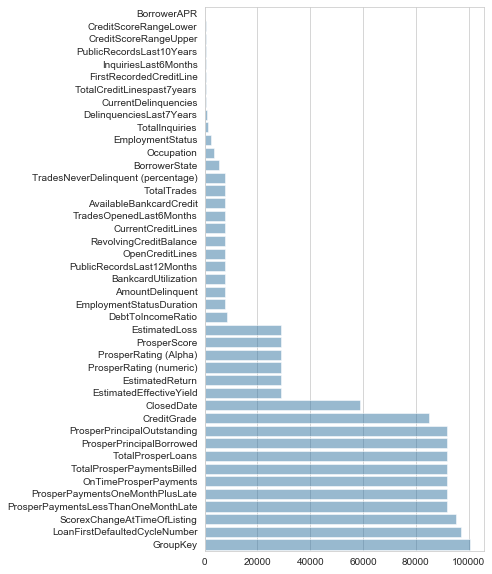

In [9]:
plt.figure(figsize = (5,10))

first_half = math.floor(len(df_null_counts) /2)

base_color = sns.color_palette()[0]

#plt.subplot(2,1,1)
sns.barplot(y = df_null_counts.index, x = df_null_counts.values, color=base_color, alpha = .5);

#plt.subplot(2,1,2)
#sns.barplot(x = df_null_counts.iloc[first_half:].index, y = df_null_counts.iloc[first_half:].values, color=base_color)
#plt.xticks(rotation = 90)

#plt.tight_layout();

There are a lot of missing values, particularly for the top 12 when ordered by count of nulls. These most likely related to "data unavailable or not applicable" type cases, rather than errors. 

Given the large number of variables available, we can likely ignore a number of these columns as we'll still have a lot to analyse. Considering a lot of the variables with a high degree of missing values relate to previous Prosper loan data (ie the customer has used the service in the past) they might be useful to analyse separately. 

Should I arrive at the analysis of these variables with high null counts, I may choose to assign a value, or may choose to analyse only the records in the dataset with values for these variables

# Univariate Analysis

Given that LoanStatus is the variable of interest, and there is an inherent order to the values I'll created an ordered categorical variable in order of severity of the status, from 'good' to 'bad', with cancelled at the end.

In [10]:
loan_status = ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)',
                 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Defaulted','Chargedoff','Cancelled']
loan_statuses = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status)
df['LoanStatus'] = df['LoanStatus'].astype(loan_statuses)

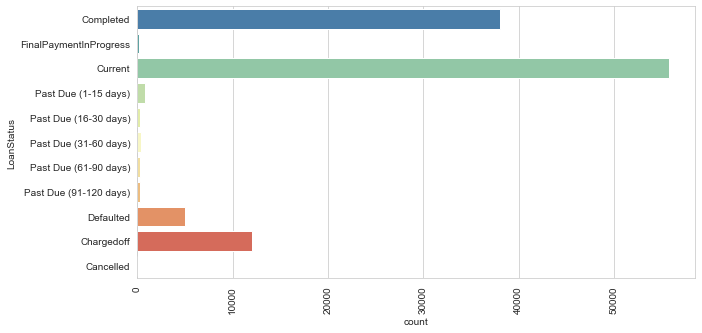

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, y = 'LoanStatus', palette='Spectral_r')
plt.xticks(rotation=90);

We can see here that Current and completed are the most frequent categories, with Defaulted and Chargedoff coming next.

There are a number of categories here that appear to be transient in that a loan can move from Current, through various stages of deliquency, through to Defaulted and Chargedoff. The above plot does not seem to indicate that LoanNumbers would appear in multiple categories (otherwise all loans counted in Defaulted and Chargedoff would also appear in the various stages of delinquency, and the counts would look different) however I'll confirm that first moving on.

In [12]:
df[df.ListingKey.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117,NaN,36,Current,NaT,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053,NaN,60,Current,NaT,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037,NaN,60,Current,NaT,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317,NaN,36,Current,NaT,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287,NaN,36,Current,NaT,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,FB6A35999320129979DBBA3,1158474,2014-01-23 14:33:25.967,NaN,60,Current,NaT,0.22063,0.1960,0.1860,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113636,D9BF3589576999233477E75,904020,2013-09-17 11:44:43.177,NaN,36,Current,NaT,0.21290,0.1760,0.1660,...,-9.86,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113733,E2303594522341016B8EE15,1002326,2013-11-07 14:26:31.317,NaN,60,Current,NaT,0.20593,0.1819,0.1719,...,-24.94,0.0,0.0,0.0,0.0,1.0,0,0,0.0,66
113773,DE8535960513435199406CE,1056749,2013-12-06 05:43:13.830,NaN,36,Current,NaT,0.16324,0.1274,0.1174,...,-16.79,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In fact it does appear that some ListingKeys appear twice in this dataset however there are no rows that are completely duplicated.

In [13]:
df[df.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [14]:
df.ListingKey.value_counts()

17A93590655669644DB4C06    6
349D3587495831350F0F648    4
47C1359638497431975670B    4
DE8535960513435199406CE    4
8474358854651984137201C    4
                          ..
DFBA3377424922983E3DACB    1
16C935831338794160B1195    1
96DC3574432590074621060    1
6FA43428486772869603D53    1
3B113586168876298FABB6A    1
Name: ListingKey, Length: 113066, dtype: int64

From what I can see, there are only 871 duplicate `ListingKeys` out of 113k total records, and given the small count these don't appear to meaningfully relate to loans that transition from one status to another. Therefore, I don't believe too much information will be lost by dropping them.

In [15]:
df = df.drop_duplicates(subset = ['ListingKey']).copy()

In [16]:
df[df.ListingKey.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


#### Distribution of Loan Amount

Below we can see that the distribution of loan amount is right skewed (tends to the lower end of the scale) with a mode value of $4k, a max value of 35k. Above 5k, it shows relative peaks at each increment of 5k thereafter.

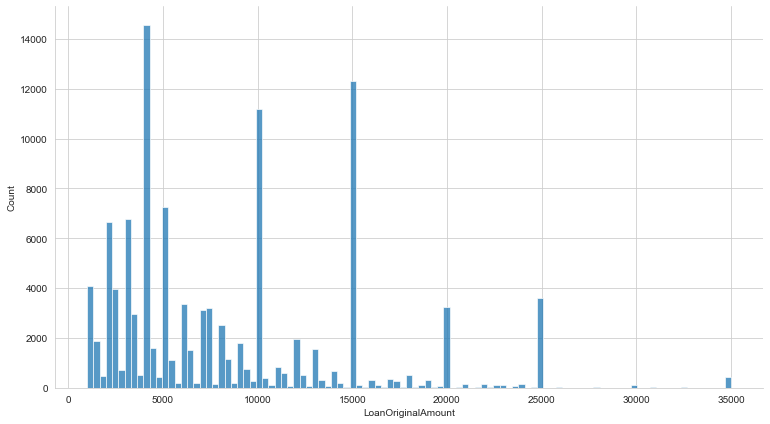

In [17]:
sns.displot(data = df, x = 'LoanOriginalAmount', height =6, aspect = 1.8);

In [39]:
df.LoanOriginalAmount.value_counts()

4000     14207
15000    12232
10000    10956
5000      6953
2000      6042
         ...  
14383        1
6251         1
14447        1
6379         1
4098         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

In [41]:
df.LoanOriginalAmount.max()

35000

#### Prosper Rating

In [18]:
df['ProsperRating (numeric)'].value_counts()

4.0    18096
5.0    15368
6.0    14390
3.0    14170
2.0     9716
1.0     6917
7.0     5325
Name: ProsperRating (numeric), dtype: int64

In [19]:
df['ProsperRating (Alpha)'].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

As mentioned earlier there are two methods of representing the Prosper Rating and I should discard one. I'll stick with the Alpha ratings system. Despite there being numbers available, they are categorical and aren't going to have any mathematical value so I will discard the numeric ratings

In [20]:
df = df.drop(columns=['ProsperRating (numeric)']).copy()

I'll also give the ratings an ordered datatype so they retain their inherent order - N/A, HR, E, D, C, B, A, AA

In [21]:
ratings = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ratings_type = pd.api.types.CategoricalDtype(categories= ratings, ordered = True)


In [22]:
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ratings_type)

In [23]:
#replacing NaNs with string "N/A" as I want to analyse whether or not N/A as a category has any effect on risk
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].fillna('N/A')

#### Prosper Rating Counts

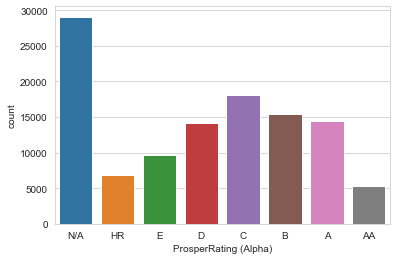

In [24]:
sns.countplot(data = df, x = 'ProsperRating (Alpha)');

Aside from the N/A type where no rating has been assigned, the distribution of ratings seems unimodal, centered around the C rating which is more or less the middle of the scale. Once I get into bivariate analysis, I will definitely analyse the Prosper rating against loan status to see if the ratings system is a good measure of risk

#### Credit Grade

In [25]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

I haven't found documentation on what the CreditGrade scale is, however as the values are very similar to the ProsperRating, I'll order them the same way, with NC at the lowest end of the scale. Noting here of course that there will be a large number of NAs which I will handle in the same way as the ProsperRating

In [26]:
df['CreditGrade'] = df['CreditGrade'].fillna('N/A')
grades = ['N/A', 'NC','HR', 'E', 'D', 'C', 'B', 'A', 'AA']
grades_type = pd.api.types.CategoricalDtype(categories= grades, ordered = True)
df['CreditGrade'] = df['CreditGrade'].astype(ratings_type)

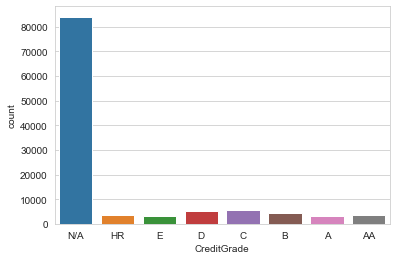

In [27]:
sns.countplot(data = df, x = 'CreditGrade');

As there are too many N/As to visualise this effectively, I'll run the same visualisation on a version of the DF without the N/As

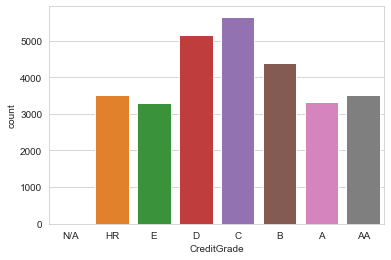

In [28]:
df_credit_graded = df.query('CreditGrade != "N/A"')
sns.countplot(data = df_credit_graded, x = 'CreditGrade');

This looks relatively similar to the ProsperRating distribution ie. somewhat unimodel centered on C, however it looks like credit grades show higher proportional counts at the extremes.

Because logically these two variables seem to try to acheive the same thing (categorise risk levels), it could be very interesting to investigate the difference in their effecitveness

1. BorrowerState

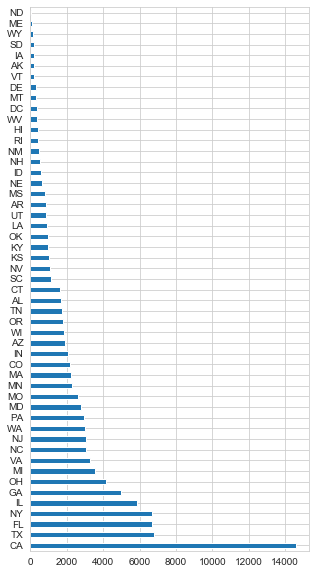

In [29]:
plt.figure(figsize=(5,10))
df.BorrowerState.value_counts().plot(kind='barh');


The overwhelming majority of borrowers appear to live in California. That being said, there are many more people in California than in North Dakota for example, so it may also be interesting to look at the borrowers per state as a % of each state's population. That data isn't in this dataset, but I can find it elsewhere

I'll look later into whether or not certain states have a higher rate of defaulted loans. 

2. Occupation

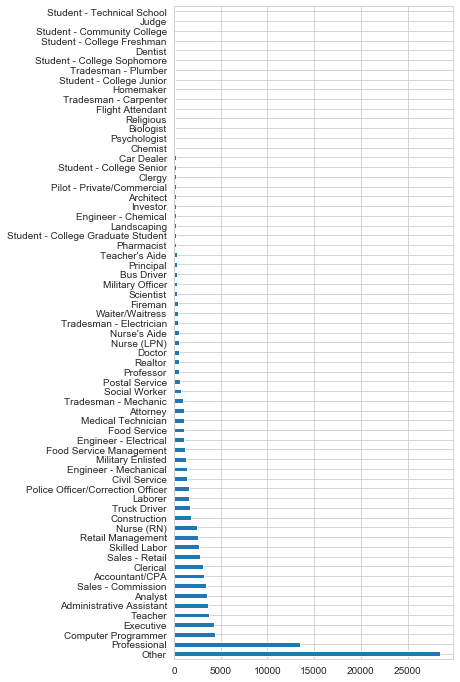

In [30]:
plt.figure(figsize=(5,12))
df.Occupation.value_counts().plot(kind = 'barh');

3. EmploymentStatus

In [45]:
df.EmploymentStatus.value_counts()

Retired            795
Not employed       835
Part-time         1088
Other             3742
Not available     5347
Self-employed     6052
Full-time        26354
Employed         66598
Name: EmploymentStatus, dtype: int64

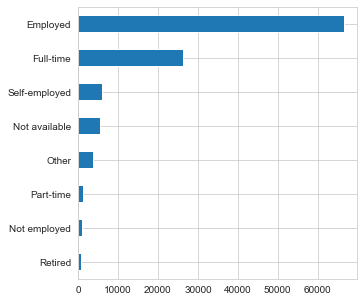

In [47]:
plt.figure(figsize=(5,5))
df.EmploymentStatus.value_counts(ascending=True).plot(kind = 'barh');

There are two logically ambiguous employment statuses here, "Employed" and "Other". Other may relate to student or some other state not captured by the allowable answers, however it's a minority class here, representing only 3.7k of the total. 

"Employed" on the other hand is the majority by a factor of 2 over the next most frequent class, but is also ambiguous in that one would assume people who are employed could fit into one of the other employment subcategories.

Given this, there's a chance there may not be much in the way of useful insight into the default rate based on EmploymentStatus, however I will investigate anyway.

4. DelinquenciesLast7Year

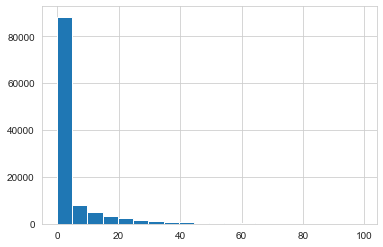

In [50]:
df.DelinquenciesLast7Years.hist(bins=20);

Above we see that the vast majority of borrowers have had no recorded delinquencies in the last 7 years. However it appears there are some quite high numbers of delinquencies represented on this scale, so I'll zoom in a little on this and remove the 0 values from the visualisation

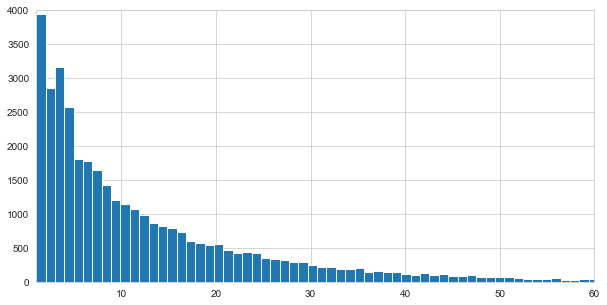

In [63]:
plt.figure(figsize=(10,5))
df.DelinquenciesLast7Years.hist(bins=100)
plt.xlim(1,60)
plt.ylim(0,4000);

With the Y axis limit set to 4k and X axis limit to remove the 0 values, we can see more clearly the distribution of delinquencies >0 in the borrower data. 

It should be noted that delinquencies are likely be strongly correlated to the higher risk credit grades, lower prosper ratings and other variables in this data, and this correlation would need to be taken into account if building a model to predict borrowers who are likely to default.